In [1]:
pip install tensorflow 

     -------------------------------------- 444.1/444.1 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 14.2/14.2 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB ? eta 0:00:00
     -------------------------------------- 123.4/123.4 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 2.1 MB/s eta 0:00:00
     ------------------------------

In [ ]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 
from tensorflow import keras 

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.drop(['RowNumber','Surname'], axis = 'columns', inplace =True)

In [6]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
col_obj = ['Geography', 'Gender']

In [10]:
for col in df:
    if (col in col_obj):
        print(col,":",df[col].unique())

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [11]:
df['Gender'].replace(['Male', 'Female'],[1, 0], inplace= True)

In [12]:
df= pd.get_dummies(data = df, columns=['Geography'])
df.columns

Index(['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [13]:
df.dtypes

CustomerId             int64
CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [14]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
df_exited = df[df['Exited']==1]['Tenure']
df_not_exited = df[df['Exited']==0]['Tenure']

In [16]:
 def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

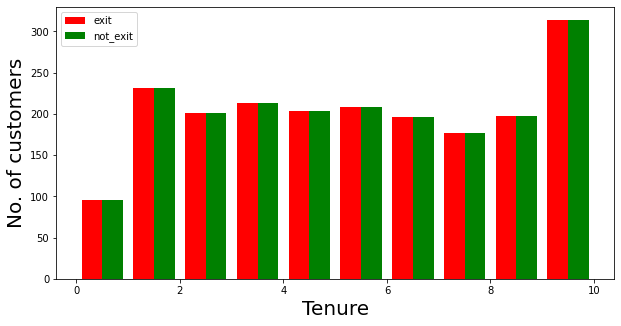

In [17]:
visualization(df_exited, df_exited, "Tenure")

In [18]:
df_exited2 = df[df['Exited']==1]['Age']
df_exited2 = df[df['Exited']==0]['Age']

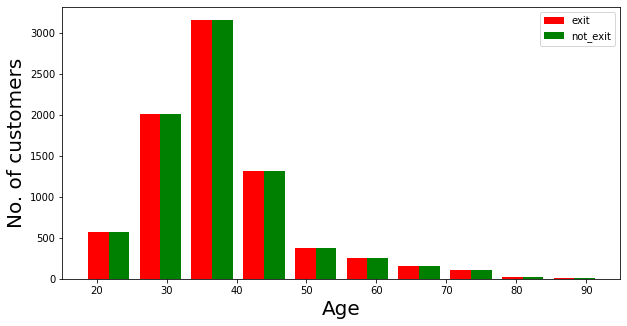

In [19]:
visualization(df_exited2, df_exited2, "Age")

In [20]:
df.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [21]:
cols_to_scale = ['CustomerId','CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [23]:
df.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.275616,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.326454,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.214421,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.542636,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,0.688778,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [24]:
x = df.drop('Exited', axis= 'columns')
y = df['Exited']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state =1)

In [26]:
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,),activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=200)

Epoch 1/200
250/250 [==============================] - 1s 1ms/step - loss: 0.5248 - accuracy: 0.7694
Epoch 2/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.8005
Epoch 3/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.8099
Epoch 4/200
250/250 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.8150
Epoch 5/200
250/250 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.8173
Epoch 6/200
250/250 [==============================] - 0s 996us/step - loss: 0.4213 - accuracy: 0.8209
Epoch 7/200
250/250 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8249
Epoch 8/200
250/250 [==============================] - 0s 964us/step - loss: 0.4056 - accuracy: 0.8280
Epoch 9/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8328
Epoch 10/200
250/250 [==============================] - 0s 996us/step - loss: 0.3855 - 

In [27]:
yp = model.predict(x_test)

63/63 [==============================] - 0s 645us/step


In [28]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,yp))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)